In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [ ]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

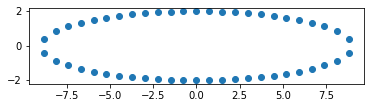

In [ ]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [ ]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

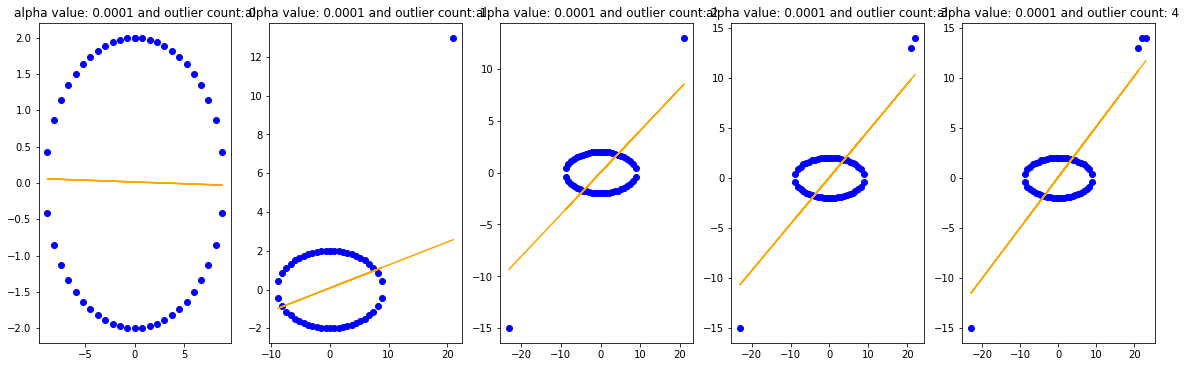

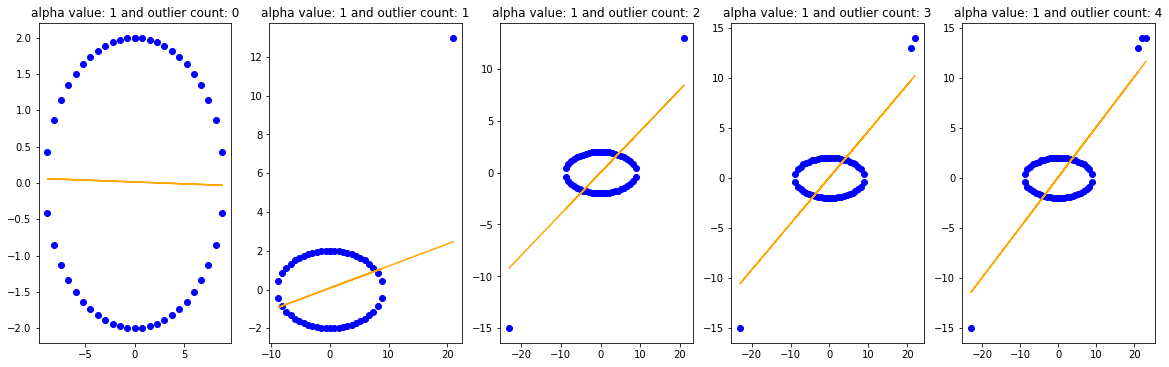

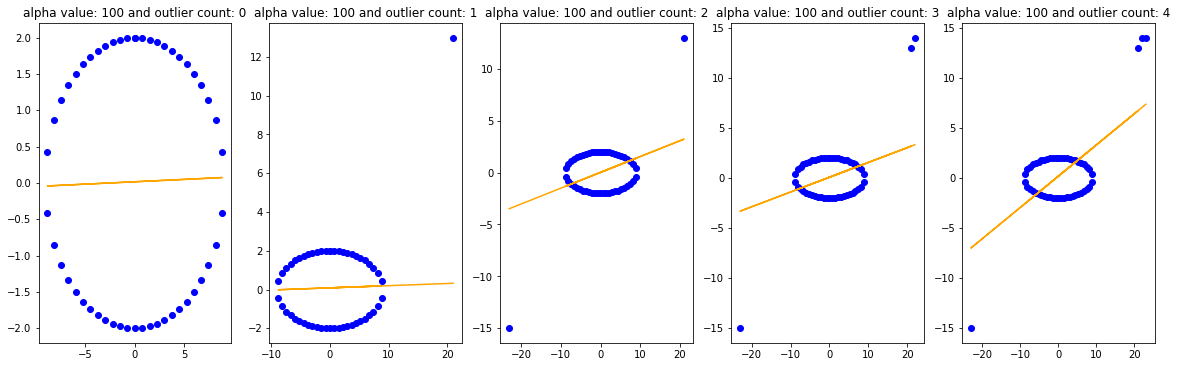

In [ ]:
alphas = [0.0001,1,100]
list_of_outliers =  [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 

for i,alpha in enumerate(alphas):
  plt.figure(figsize=(20,20))
  X= b * np.sin(phi)
  Y= a * np.cos(phi) 
  for id,outlier in enumerate(list_of_outliers):
    plt.subplot(3,len(list_of_outliers),id+1)

    X = np.append(X,outlier[0]).reshape(-1,1)  #here we add the x of the outlier to X that we have got from above function calls
    Y = np.append(Y,outlier[1]).reshape(-1,1)   #here we add the x of the outlier to Y that we have got from above function calls
    
    regr= SGDRegressor(alpha=alpha, eta0=0.001, learning_rate='constant',random_state=0)
    regr.fit(X.reshape(-1,1),Y.reshape(-1,1))
    weight = regr.coef_[0]
    intercept = regr.intercept_[0]

    line = weight  * X  + intercept
    plt.scatter(X,Y,color = 'blue')
    plt.plot(X,line,color='orange')
    plt.title("alpha value: {} and outlier count: {}".format(alpha,id))
plt.show()


Observations:
A greater alpha value is making sure the effects of outliers are balanced i.e., they do not have as much affect on the plane. We see that in the sequence of increasing alphas. We can say the regularization is helping out with affect of outlier on the plane.